In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import numpy as np
np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Dropout
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot, plot
from keras.preprocessing import sequence

Using Theano backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10 # class size
input_unit_size = 28*28 # input vector size

In [3]:
# 前処理
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test  = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255

# one-hot representation
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
60000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Dense(128, input_dim=input_unit_size, init='glorot_uniform'))
model.add(Activation("relu"))
model.add(Dropout(p=0.2))
model.add(Dense(nb_classes, init='glorot_uniform'))
model.add(Activation('softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
nb_epoch = 5

# training
result = model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=256, verbose=2,  validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
1s - loss: 0.4285 - acc: 0.8743 - val_loss: 0.1888 - val_acc: 0.9456
Epoch 2/5
1s - loss: 0.2031 - acc: 0.9417 - val_loss: 0.1353 - val_acc: 0.9637
Epoch 3/5
1s - loss: 0.1532 - acc: 0.9555 - val_loss: 0.1273 - val_acc: 0.9638
Epoch 4/5
1s - loss: 0.1277 - acc: 0.9623 - val_loss: 0.1075 - val_acc: 0.9692
Epoch 5/5
1s - loss: 0.1110 - acc: 0.9667 - val_loss: 0.0938 - val_acc: 0.9739


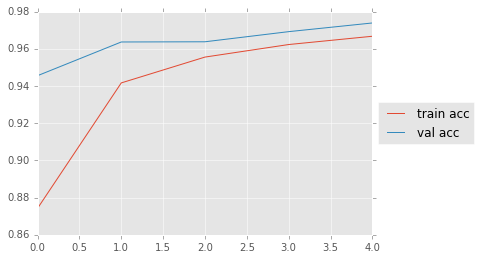

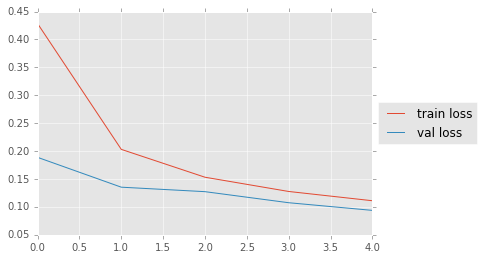

In [6]:
x = range(nb_epoch)
plt.plot(x, result.history['acc'], label="train acc")
plt.plot(x, result.history['val_acc'], label="val acc")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, result.history['loss'], label="train loss")
plt.plot(x, result.history['val_loss'], label="val loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))